# FINTECH Quant Trading Lecture04

In [24]:
import os
import sys
import warnings
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
path = os.path.dirname(os.getcwd())
sys.path.append(path)
fig_folder = "QT_Lecture_04"

# ------ 存放数据的文件夹 ------ #
lecturedata_path = os.path.join(path, 'resources', 'lecturedata')
homeworkdata_path = os.path.join(path, 'resources', 'homeworkdata')
if not os.path.exists(lecturedata_path):
    os.mkdir(lecturedata_path)
else:
    pass
if not os.path.exists(homeworkdata_path):
    os.mkdir(homeworkdata_path)
else:
    pass

from common.filesio import FilesIO
from common.figsio import FiguresIO

# Read Data

In [2]:
def loan_index_wind( path, startdate = None, enddate = "20200430" ):
    """
    startdate = "20020104", enddate = "20200430"
    """
    
    df = pd.read_excel( path, parse_dates = [2] )
    print( set(df["名称"].tolist()) )
    df.rename( columns = {
                        "开盘价(元)":"open",
                        "最高价(元)":"high",
                        "最低价(元)":"low",
                        "收盘价(元)":"close",
                        "日期":"trade_time",
                        "成交额(百万)":"amount",
                        "成交量(股)":"vol",
                        },
                        inplace = True
                     )
    df = df[["trade_time", "open", "high", "low", "close", "vol", "amount"]].dropna()
    df.set_index( "trade_time", inplace = True )
    df.sort_index( inplace = True )
    if startdate is not None and enddate is not None:
        return df[ startdate:enddate ]
    elif startdate is not None:
        return df[ startdate: ]
    elif enddate is not None:
        return df[ :enddate ]
    else:
        return df

# IO

In [3]:
pathdict = {
    "上证指数": FilesIO.getLectureData("stockdata/index/000001.xlsx"),
    "深证成指": FilesIO.getLectureData("stockdata/index/399001.xlsx"),
    "万得全A": FilesIO.getLectureData("stockdata/index/万得全A.xlsx"),
}

In [4]:
newdata = loan_index_wind( pathdict[ '上证指数' ], startdate = "20020104" )

{nan, '上证指数'}


In [5]:
newdata.head()

open     high      low    close          vol   amount
trade_time                                                          
2002-01-04  1643.48  1643.50  1608.83  1611.39  302848200.0  3211.05
2002-01-07  1605.74  1605.74  1584.66  1596.76  299697200.0  3033.08
2002-01-08  1594.87  1607.72  1582.45  1583.46  348254100.0  3752.64
2002-01-09  1580.71  1580.72  1552.56  1561.35  447451800.0  4243.77
2002-01-10  1556.74  1580.01  1523.66  1576.44  558604200.0  5529.78

# Basic Plots

save figure stock_price_2018_2019...


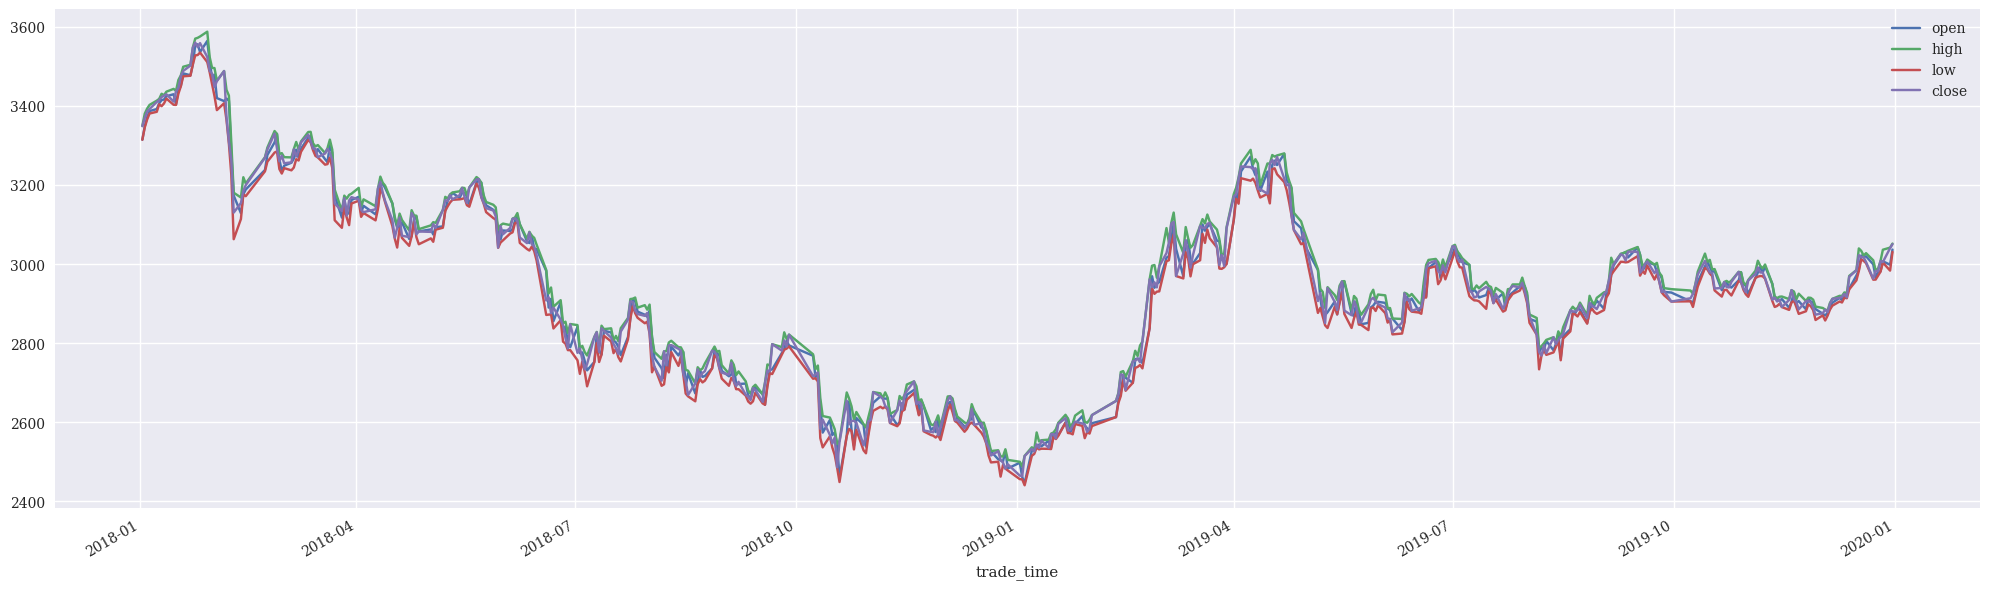

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
newdata[ ["open", "high", "low", "close"] ]["2018":"2019"].plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("stock_price_2018_2019", fig_folder)
plt.show()

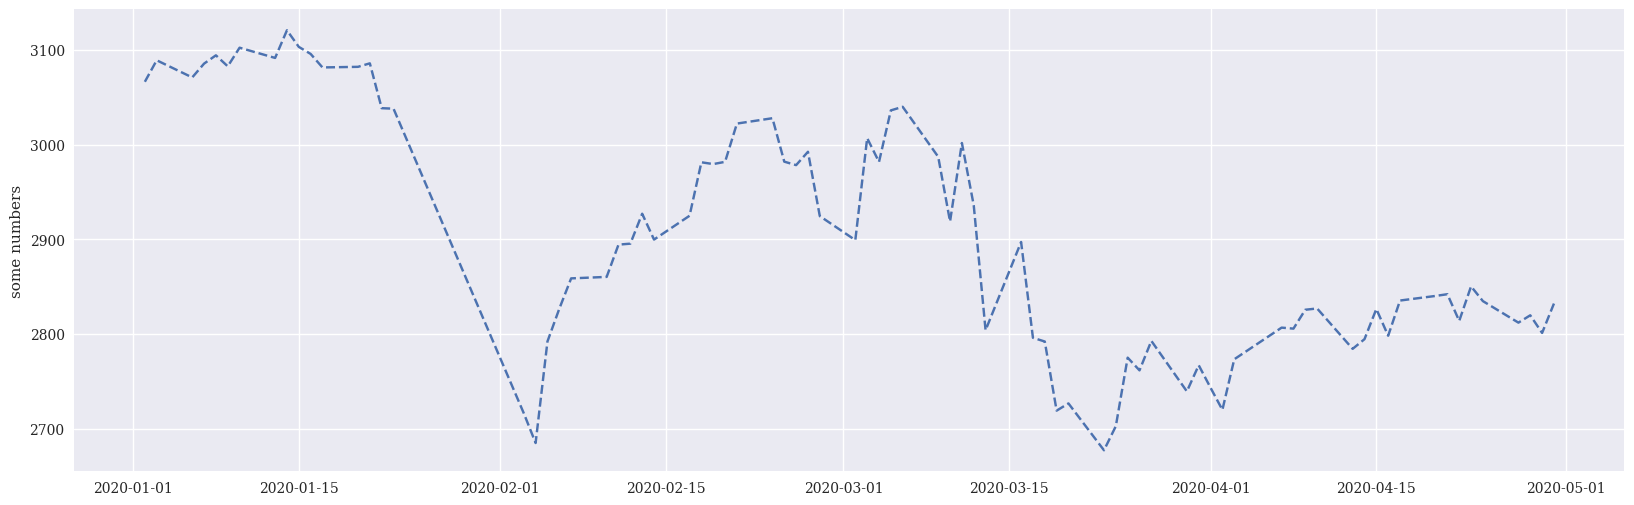

In [8]:
plt.figure( figsize = ( 20, 6 ) )
plt.plot(newdata["open"]['2020':], linestyle = '--')
plt.ylabel('some numbers')
plt.show()

### character description

'-'       solid line style

'--'      dashed line style

'-.'      dash-dot line style

':'       dotted line style

'.'       point marker

','       pixel marker

'o'       circle marker

'v'       triangle_down marker

'^'       triangle_up marker

'<'       triangle_left marker

'>'       triangle_right marker

'1'       tri_down marker

'2'       tri_up marker

'3'       tri_left marker

'4'       tri_right marker

's'       square marker

'p'       pentagon marker

'*'       star marker

'h'       hexagon1 marker

'H'       hexagon2 marker

'+'       plus marker

'X'       x marker

'D'       diamond marker

'd'       thin_diamond marker


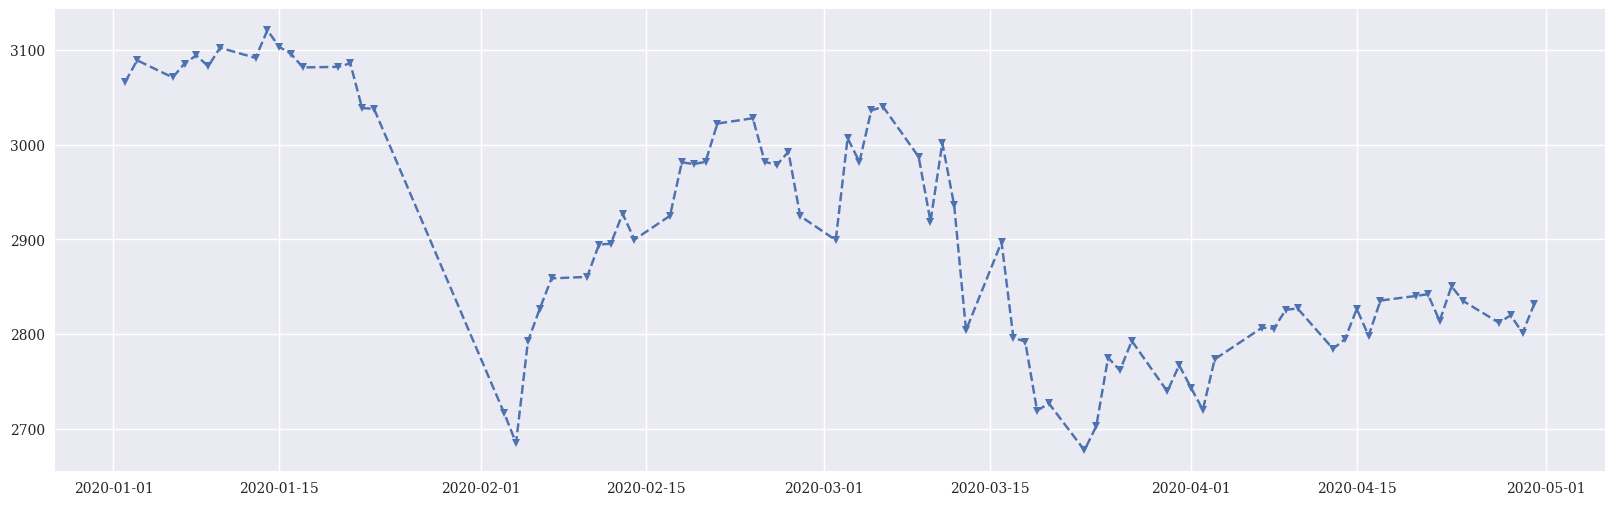

In [9]:
plt.figure( figsize = ( 20, 6 ) )
plt.plot(newdata["open"]['2020':], marker='v', linestyle = '--', markersize=6)
#plt.ylabel('some numbers')
plt.show()

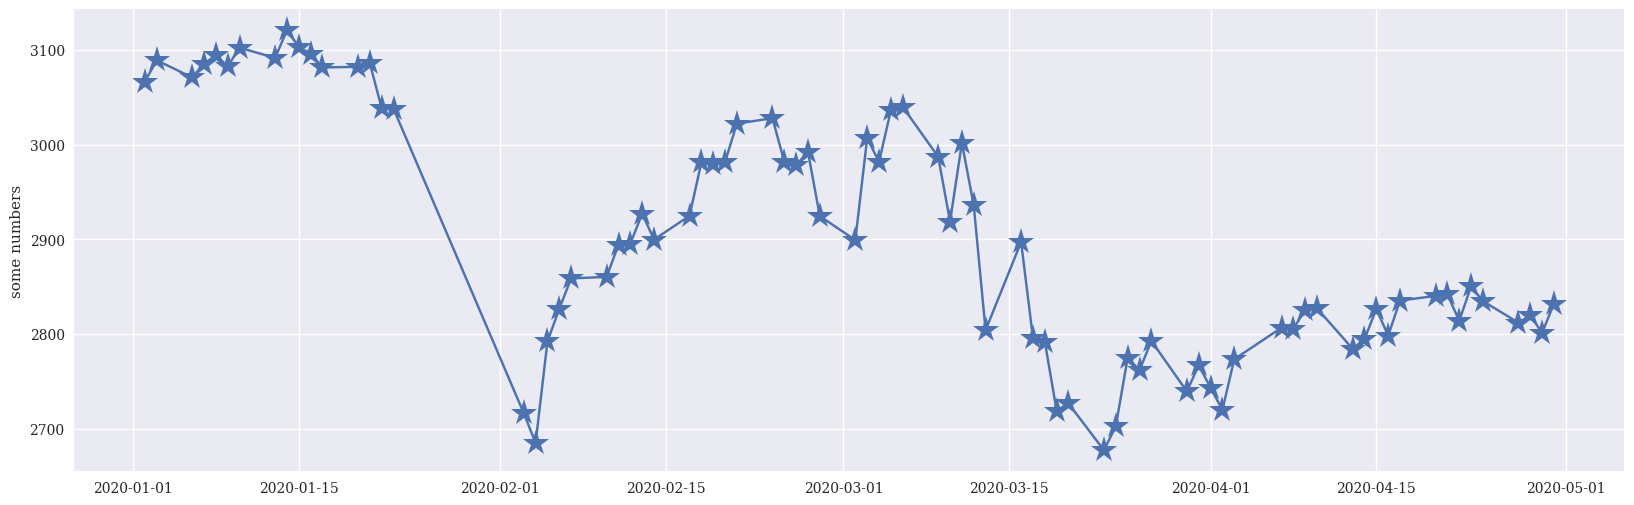

In [10]:
plt.figure( figsize = ( 20, 6 ) )
plt.plot(newdata["open"]['2020':], marker='*', markersize=20)
plt.ylabel('some numbers')
plt.show()

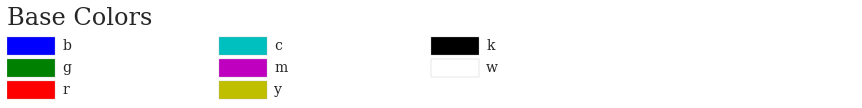

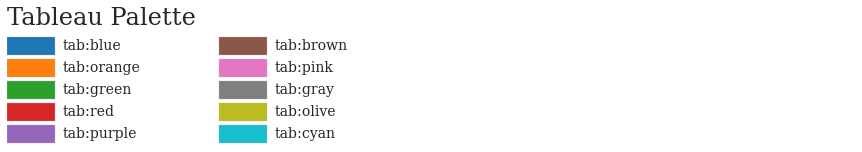

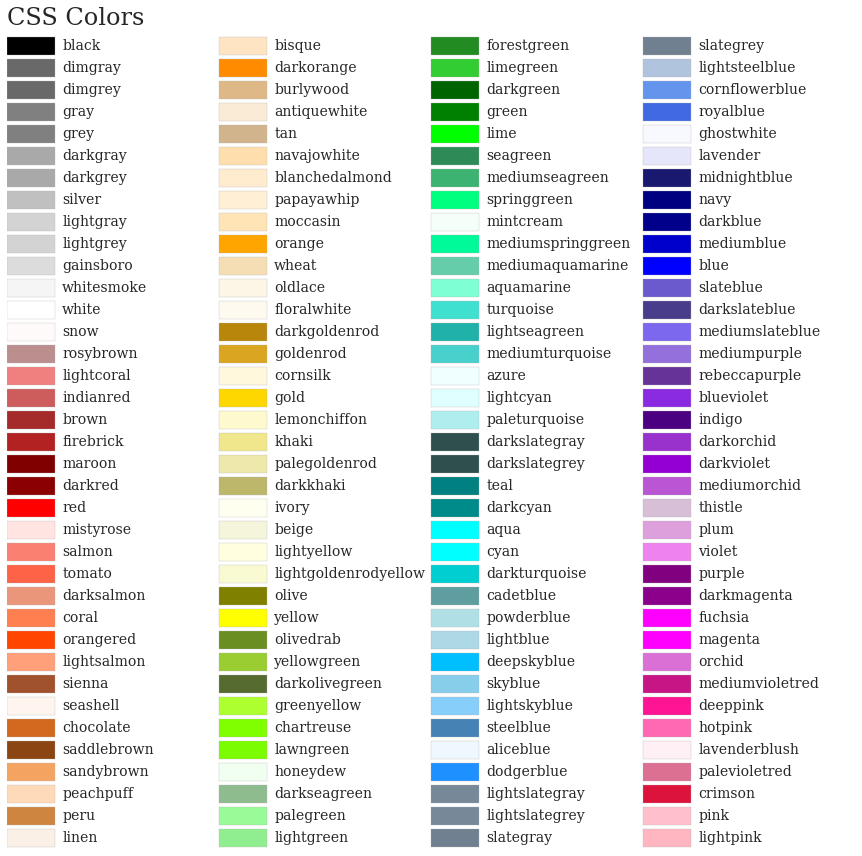

In [11]:
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
#xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
#xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

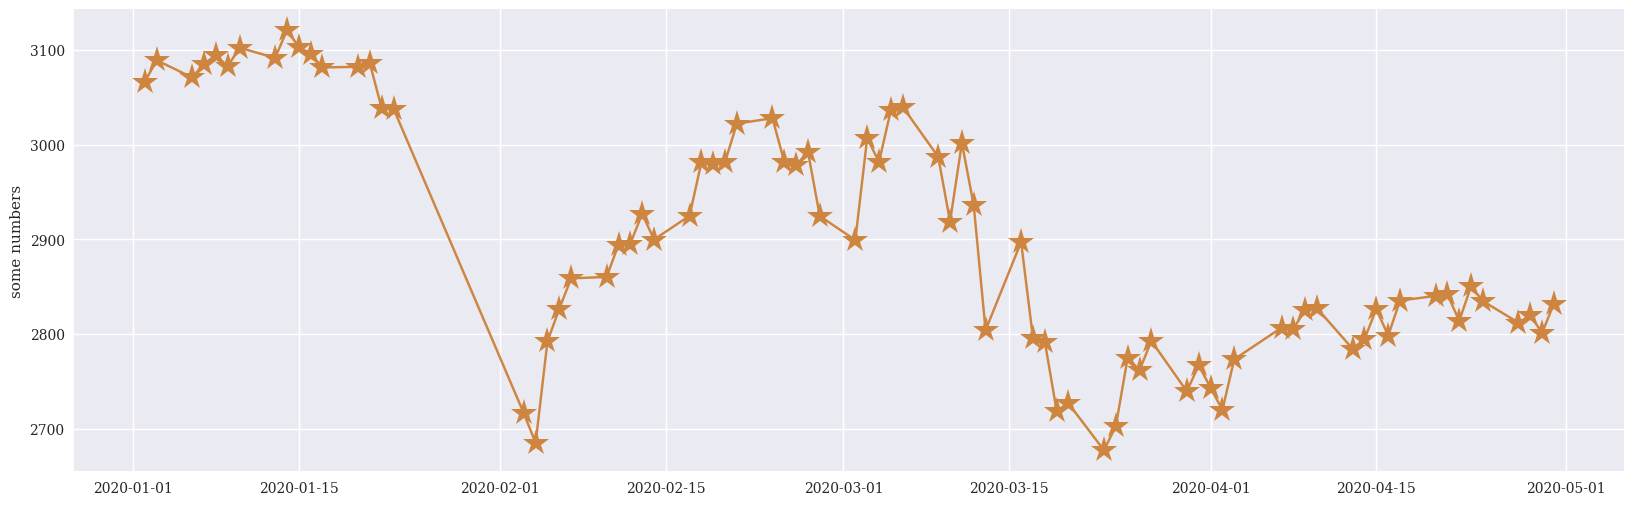

In [12]:
plt.figure( figsize = ( 20, 6 ) )
plt.plot(newdata["open"]['2020':], marker='*', markersize=20, color = 'peru')
plt.ylabel('some numbers')
plt.show()

In [24]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

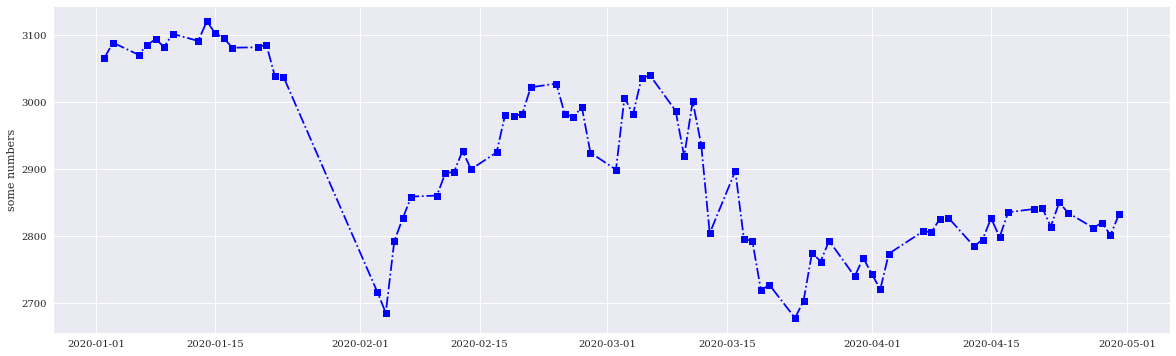

In [31]:
plt.figure( figsize = ( 20, 6 ) )
plt.plot(newdata["open"]['2020':], 'bs-.')
plt.ylabel('some numbers')
plt.show()

# Multiple Plots

In [13]:
datadict = {}
for name, path in pathdict.items():
    bm = loan_index_wind( path, startdate = "20020104" )
    datadict[ name ] = bm.close

{nan, '上证指数'}
{nan, '深证成指'}
{nan, '万得全A'}


In [14]:
data = list(datadict.items())

In [15]:
data

[('上证指数',
  trade_time
  2002-01-04    1611.39
  2002-01-07    1596.76
  2002-01-08    1583.46
  2002-01-09    1561.35
  2002-01-10    1576.44
                 ...   
  2020-04-24    2808.53
  2020-04-27    2815.49
  2020-04-28    2810.02
  2020-04-29    2822.44
  2020-04-30    2860.08
  Name: close, Length: 4446, dtype: float64),
 ('深证成指',
  trade_time
  2002-01-04     3265.88
  2002-01-07     3231.80
  2002-01-08     3201.57
  2002-01-09     3149.30
  2002-01-10     3159.45
                  ...   
  2020-04-24    10423.46
  2020-04-27    10452.17
  2020-04-28    10501.15
  2020-04-29    10514.17
  2020-04-30    10721.78
  Name: close, Length: 4446, dtype: float64),
 ('万得全A',
  trade_time
  2002-01-04    1172.41
  2002-01-07    1159.07
  2002-01-08    1149.41
  2002-01-09    1128.37
  2002-01-10    1138.50
                 ...   
  2020-04-24    4162.00
  2020-04-27    4168.83
  2020-04-28    4156.58
  2020-04-29    4163.08
  2020-04-30    4233.82
  Name: close, Length: 4446, dtype: 

0 上证指数
1 深证成指
2 万得全A
0 上证指数
1 深证成指
2 万得全A


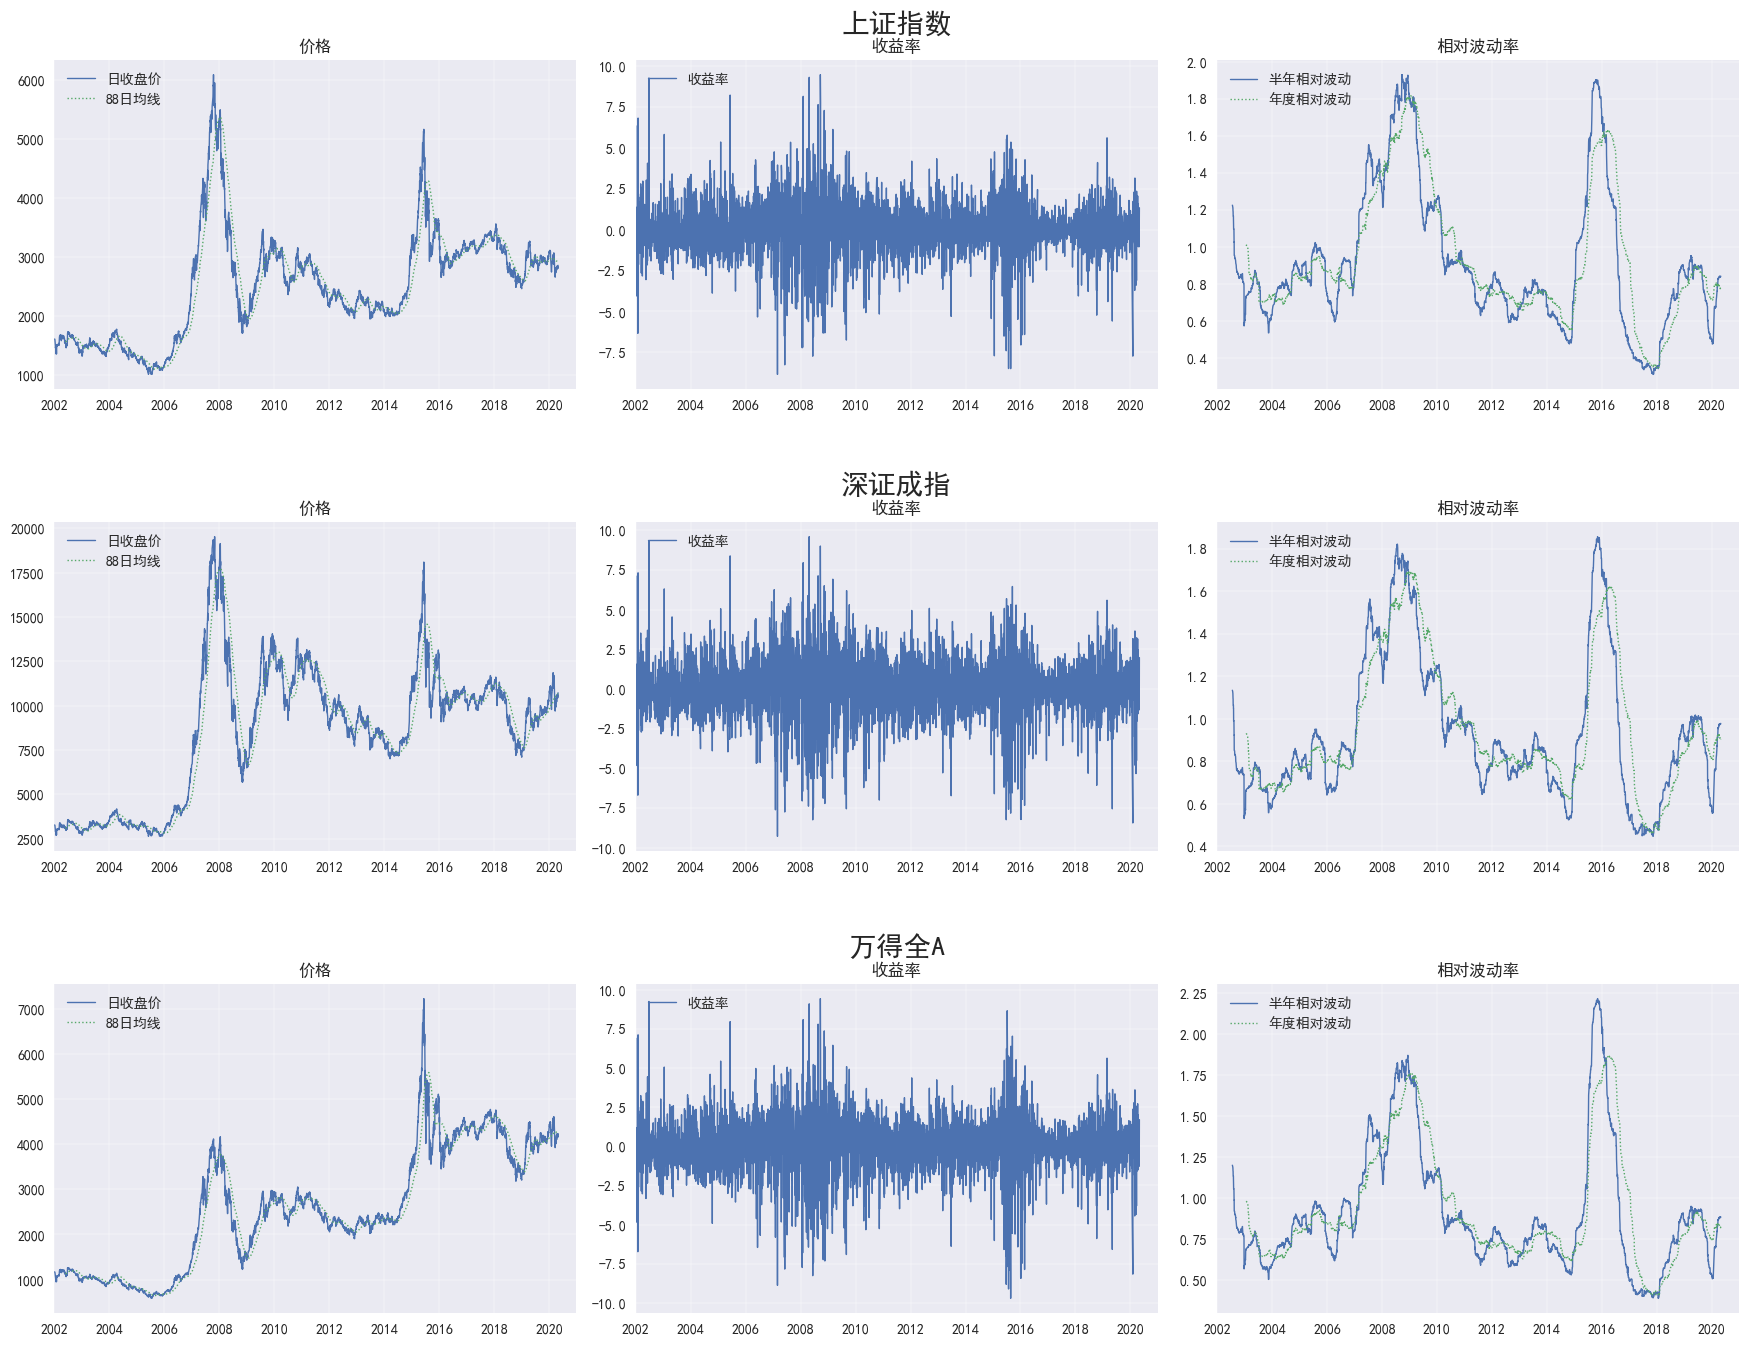

In [25]:

fig, big_axes = plt.subplots( figsize=(18.0, 14.0) , nrows=3, ncols=1, sharey=True) 

for row, big_ax in enumerate(big_axes, start=1):
    print( row-1, data[row-1][0] )
    big_ax.set_title(data[row-1][0], fontsize=20, pad = 20)

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', \
                       left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


for i in range(0,3):
    ind = i
    print(ind, data[ind][0])
    ax = fig.add_subplot(3,3,3*i+1)  ######One######
    ax.set_title('价格')
    
    level = data[ind][1]
    
    ax.plot( level, linewidth = 1, label = '日收盘价' )
    ax.plot( level.rolling(88).mean(), linestyle = ':', linewidth = 1, \
            label = '88日均线' )
    ax.grid( linestyle = '-', linewidth = 0.3 )
    ax.set_xlim([dt.date(2002, 1, 1), dt.date(2020, 12, 31)])
    ax.legend(loc='upper left')
    
    ret = data[ind][1].pct_change()*100

    ax = fig.add_subplot(3,3,3*i+2)   ######Two######
    ax.plot( ret, linewidth = 1, label = '收益率')
    ax.grid( linestyle = '-', linewidth = 0.3 )
    ax.set_xlim([dt.date(2002, 1, 1), dt.date(2020, 12, 31)])
    ax.set_title('收益率')
    ax.legend(loc='upper left')
    
    deviation = ret.std()
    
    ax = fig.add_subplot(3,3,3*i+3)    #####Three#####
    ax.plot( ret.rolling(126).std()/deviation, linewidth = 1, label = '半年相对波动')
    ax.plot( ret.rolling(252).std()/deviation, linewidth = 1, linestyle = ':', \
            label = '年度相对波动')
    ax.grid( linestyle = '-', linewidth = 0.3 )
    ax.set_xlim([dt.date(2002, 1, 1), dt.date(2020, 12, 31)])
    ax.set_title('相对波动率')
    ax.legend(loc='upper left')

#fig.set_facecolor('w')
plt.tight_layout()
plt.show()

# Interactive Plots

In [9]:
import cufflinks as cf
import plotly.offline as pylo

In [26]:
newdata = loan_index_wind( pathdict[ '上证指数' ], startdate = "20020104" )

{nan, '上证指数'}


In [11]:
pylo.iplot( 
    newdata.iplot( asFigure = True )
    )

In [12]:
pylo.iplot( newdata[["open", "close"]]['2018':].iplot( asFigure = True,
                                theme = 'polar',
                                title = '上证指数',
                                xTitle = 'date',
                                yTitle = 'value',
                                mode = { 'open': 'markers', 'close': 'lines+markers' },
                                symbol = { 'open': 'circle', 'close': 'diamond' },
                                size = 3.5,
                                colors = { 'open': 'blue', 'close': 'magenta' }
                                ) )

In [13]:
fig = newdata[["vol", "amount"]]['2018':].iplot( asFigure = True,
                                             kind = 'bar',
                                            theme = 'polar',
                                             subplots = True
                                            )
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        dict(values=["2018-01-01", "2019-01-01", "2020-01-01"])  # hide New Year's
    ]
)
pylo.iplot( fig )


In [14]:
cf.set_config_file(offline=True, world_readable=True)
qf = cf.QuantFig(
    newdata[ ["open", "high", "low", "close"] ]['2018':],
    title = '上证指数',
    legend = 'top',
    name = '上证指数',
)
layout = dict(
    xaxis=dict(
        #categoryorder="category ascending",#Screening unless trading day
        type='category')
)

In [15]:
pylo.iplot( 
    qf.iplot( asFigure = True, 
            layout=layout
            ),)

In [61]:
qf.add_bollinger_bands(
    periods = 15, boll_std = 2
)

In [62]:
pylo.iplot(
    qf.iplot(
        asFigure = True, layout=layout,
    )
)

In [63]:
qf.add_rsi( periods = 14,
                      showbands = False)

In [64]:
pylo.iplot( 
    qf.iplot( asFigure = True, 
            #layout=layout,
             up_color = 'red', down_color = 'green'
          ),
    
)